### Regresión lineal VI
## Estandarización

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta.

In [2]:
df = pd.read_csv("../datos/supermarket_no_normalizado.csv", index_col = 0)

In [3]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra,RATING_BOX,RATING_LOG
Invoice ID,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,Mañana,January,5.620596,2.208274
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,Mañana,March,5.903958,2.261763


Los objetivos del pair programming de hoy son:

Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.



    Nuestras variables predictoras son categóricas, por lo tanto todo lo contenido en este jupyter es meramente para practicar pero no nos servirá para crear nuestro modelo de ML de regresion lineal.

Primero vamos a estandarizar las variables numéricas con el método RobustScaler. Recordamos que teníamos unos pocos outliers y este método sería el más adecuado.

In [4]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,Unit price,Quantity,Tax 5%,Total,Rating,RATING_BOX,RATING_LOG
Invoice ID,,,,,,,
750-67-8428,74.69,7,26.1415,548.9715,9.1,5.620596,2.208274
226-31-3081,15.28,5,3.8200,80.2200,9.6,5.903958,2.261763
631-41-3108,46.33,7,16.2155,340.5255,7.4,4.625511,2.001480
123-19-1176,58.22,8,23.2880,489.0480,8.4,5.217129,2.128232
373-73-7910,86.31,7,30.2085,634.3785,5.3,3.310581,1.667707


Quitamos la variable respuesta

In [6]:
numericas.drop(['Rating', "RATING_BOX", "RATING_LOG"], axis = 1, inplace = True)

In [7]:
numericas.head(1)

,Unit price,Quantity,Tax 5%,Total
Invoice ID,,,,
750-67-8428,74.69,7,26.1415,548.9715


In [8]:
robust = RobustScaler()

In [9]:
robust.fit(numericas)

RobustScaler()

In [10]:
X_robust = robust.transform(numericas)

In [11]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,Unit price,Quantity,Tax 5%,Total
0,0.431869,0.4,0.850677,0.850677
1,-0.886596,0.0,-0.500473,-0.500473


In [12]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Unit price es:  0.009812028406568935
La desviación estándar de la columna Unit price es: 0.5879855381251612
-------------------------------------------------------------
La media de la columna Quantity es:  0.102
La desviación estándar de la columna Quantity es: 0.584686119091138
-------------------------------------------------------------
La media de la columna Tax 5% es:  0.19923088912933265
La desviación estándar de la columna Tax 5% es: 0.7087505871385282
-------------------------------------------------------------
La media de la columna Total es:  0.1992308891293327
La desviación estándar de la columna Total es: 0.7087505871385285
-------------------------------------------------------------


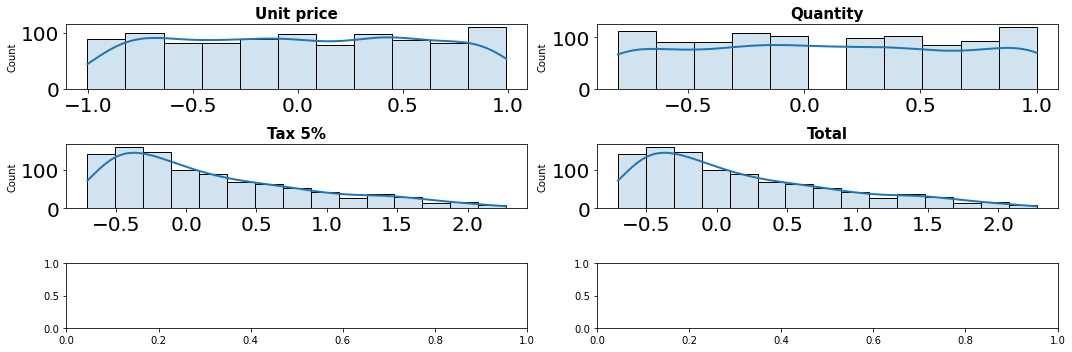

In [13]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 5))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()


In [14]:
numericas_robust

,Unit price,Quantity,Tax 5%,Total
0,0.431869,0.4,0.850677,0.850677
1,-0.886596,0.0,-0.500473,-0.500473
2,-0.197514,0.4,0.249843,0.249843
3,0.066356,0.6,0.677951,0.677951
4,0.689747,0.4,1.096858,1.096858
...,...,...,...,...
995,-0.330226,-0.8,-0.609581,-0.609581
996,0.935419,1.0,2.215567,2.215567
997,-0.519086,-0.8,-0.635337,-0.635337
998,0.235020,-0.8,-0.532494,-0.532494


In [17]:
df.reset_index(inplace = True)

In [18]:
df[numericas_robust.columns] = numericas_robust

In [19]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra,RATING_BOX,RATING_LOG
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0.431869,0.4,0.850677,0.850677,Ewallet,9.1,Mañana,January,5.620596,2.208274
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,-0.886596,0.0,-0.500473,-0.500473,Cash,9.6,Mañana,March,5.903958,2.261763


In [20]:
df.to_csv('../datos/supermarket_robust.csv')

Ahora vamos a realizar la estandarización con el método StandardScaler.

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(numericas)

StandardScaler()

In [23]:
X_escaladas = scaler.transform(numericas)

In [24]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)

In [25]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Unit price es:  -1.0658141036401502e-16
La desviación estándar de la columna Unit price es: 1.0005003753127735
-------------------------------------------------------------
La media de la columna Quantity es:  6.394884621840901e-17
La desviación estándar de la columna Quantity es: 1.0005003753127724
-------------------------------------------------------------
La media de la columna Tax 5% es:  1.2434497875801754e-16
La desviación estándar de la columna Tax 5% es: 1.0005003753127735
-------------------------------------------------------------
La media de la columna Total es:  3.1974423109204506e-17
La desviación estándar de la columna Total es: 1.0005003753127735
-------------------------------------------------------------


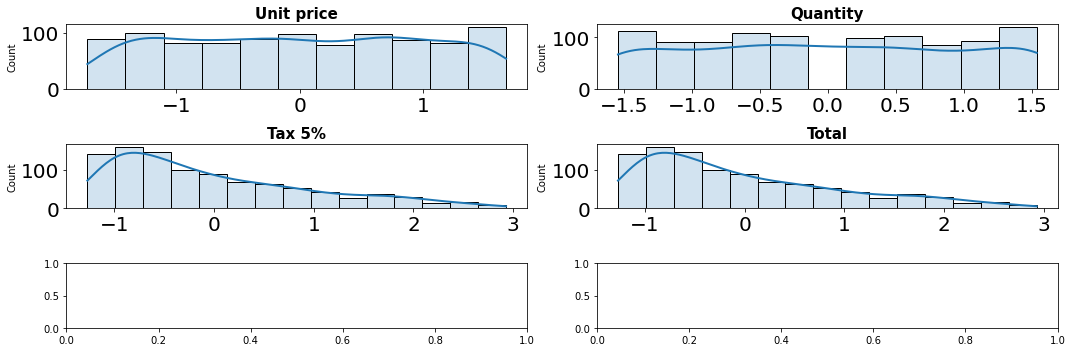

In [26]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 5))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [27]:
df.reset_index(inplace = True)

In [28]:
numericas_estandar.head()

,Unit price,Quantity,Tax 5%,Total
0,0.718160,0.509930,0.919607,0.919607
1,-1.525303,-0.174540,-0.987730,-0.987730
2,-0.352781,0.509930,0.071446,0.071446
3,0.096214,0.852165,0.675780,0.675780
4,1.156959,0.509930,1.267125,1.267125


In [29]:
df[numericas_estandar.columns] = numericas_estandar

In [30]:
df.head()

,index,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra,RATING_BOX,RATING_LOG
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,0.718160,0.509930,0.919607,0.919607,Ewallet,9.1,Mañana,January,5.620596,2.208274
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,-1.525303,-0.174540,-0.987730,-0.987730,Cash,9.6,Mañana,March,5.903958,2.261763
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,-0.352781,0.509930,0.071446,0.071446,Credit card,7.4,Mañana,March,4.625511,2.001480
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,0.096214,0.852165,0.675780,0.675780,Ewallet,8.4,Noche,January,5.217129,2.128232
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,1.156959,0.509930,1.267125,1.267125,Ewallet,5.3,Mañana,February,3.310581,1.667707


Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [31]:
df.to_csv('../datos/supermarket_standard.csv')